In [2]:
# Let's begin
from __future__ import print_function
import torch  as t
t.__version__

'1.1.0'

                                               表3-1: 常见新建tensor的方法

|函数|功能|
|:---:|:---:|
|Tensor(\*sizes)|基础构造函数|
|tensor(data,)|类似np.array的构造函数|
|ones(\*sizes)|全1Tensor|
|zeros(\*sizes)|全0Tensor|
|eye(\*sizes)|对角线为1，其他为0|
|arange(s,e,step|从s到e，步长为step|
|linspace(s,e,steps)|从s到e，均匀切分成steps份|
|rand/randn(\*sizes)|均匀/标准分布|
|normal(mean,std)/uniform(from,to)|正态分布/均匀分布|
|randperm(m)|随机排列|

这些创建方法都可以在创建的时候指定数据类型dtype和存放device(cpu/gpu).

In [2]:
t.Tensor(2,3)

tensor([[-3.4679e-27,  4.5790e-41,  4.6374e+21],
        [ 4.5790e-41, -3.2188e-27,  4.5790e-41]])

In [3]:
t.arange(1, 6, 2)

tensor([1, 3, 5])

In [4]:
t.linspace(1, 10, 3)

tensor([ 1.0000,  5.5000, 10.0000])

In [5]:
t.randn(2, 3, device=t.device('cpu'))

tensor([[ 0.0987,  0.2006, -1.4611],
        [-0.2608, -0.4850, -1.6730]])

In [6]:
t.randperm(5) # 长度为5的随机排列

tensor([1, 3, 2, 4, 0])

### t.tensor 与 np.array 使用方法几乎完全一致

### 常用tensor操作
tensor.view方法可以调整tensor的形状，但必须保证调整前后元素总数一致

In [19]:
a = t.arange(0, 6)
a.view(2, 3)

tensor([[0, 1, 2],
        [3, 4, 5]])

In [22]:
b = a.view(-1, 3) # 当某一维为-1的时候，会自动计算它的大小
b.shape

torch.Size([2, 3])

In [26]:
c = b.unsqueeze(1) # 注意形状，在第1维（下标从0开始）上增加“１” 
#等价于 b[:,None]
b.shape
b[:, None].shape
c

tensor([[[0, 1, 2]],

        [[3, 4, 5]]])

In [30]:
b.unsqueeze(-1)

tensor([[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]]])

In [31]:
b.resize_(1, 3)

tensor([[0, 1, 2]])

In [33]:
b.resize_(3, 3) # 旧的数据依旧保存着，多出的大小会分配新空间
b

tensor([[                  0,                   1,                   2],
        [                  3,                   4,                   5],
        [4189022128297176677, 4049408095958349090, 3759768343418449254]])

### 索引操作

In [35]:
# None类似于np.newaxis, 为a新增了一个轴
# 等价于a.view(1, a.shape[0], a.shape[1])
b[None].shape

torch.Size([1, 3, 3])

In [37]:
b > 1 #有点强，得到mask
# 等价于a.masked_select(a>1)
# 选择结果与原tensor不共享内存空间

tensor([[0, 0, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)

In [40]:
b[b>1]

tensor([                  2,                   3,                   4,
                          5, 4189022128297176677, 4049408095958349090,
        3759768343418449254])

In [48]:
b[t.LongTensor([0,1])]  #第0行和第1行  longtensor as index

tensor([[0, 1, 2],
        [3, 4, 5]])

In [206]:
a = t.arange(0, 16).view(4, 4)
print(a)
t.gather(a,1,t.tensor([[3,2,1,0]]).t())

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])


tensor([[ 3],
        [ 6],
        [ 9],
        [12]])

In [207]:
print(t.tensor([[3,2,1,0]]))
t.gather(a,0,t.tensor([[0,1,2,3]]))
a.gather(0,t.tensor([[0,1,2,3]]))

tensor([[3, 2, 1, 0]])


tensor([[ 0,  5, 10, 15]])

In [208]:
index = t.tensor([[0,1,2,3],[3,2,1,0]]).t()
b = a.gather(1,index)
b

tensor([[ 0,  3],
        [ 5,  6],
        [10,  9],
        [15, 12]])

In [209]:
c = t.zeros(4,4,dtype=t.long)
print(c)
c.scatter_(1, index, b)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])


tensor([[ 0,  0,  0,  3],
        [ 0,  5,  6,  0],
        [ 0,  9, 10,  0],
        [12,  0,  0, 15]])

In [210]:
x = t.arange(0,27).view(3,3,3)
x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

### 数据类型转换

In [213]:
t.set_default_tensor_type('torch.FloatTensor')

In [216]:
a = t.Tensor(2,3)
a.dtype

torch.float32

In [219]:
# 把a转成FloatTensor，等价于b=a.type(t.FloatTensor)
b = a.float()
b.dtype

torch.float32

In [223]:
c = a.type_as(b)
print(b)
c

tensor([[-3.4679e-27,  4.5790e-41,  4.5471e+21],
        [ 4.5790e-41, -3.2188e-27,  4.5790e-41]])


tensor([[-3.4679e-27,  4.5790e-41,  4.5471e+21],
        [ 4.5790e-41, -3.2188e-27,  4.5790e-41]])

In [225]:
t.zeros_like(a) #等价于t.zeros(a.shape,dtype=a.dtype,device=a.device)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [226]:
a.new_ones(4,5, dtype=t.int)

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.int32)

In [227]:
a.new_ones(4,5)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

#### 逐元素操作

这部分操作会对tensor的每一个元素(point-wise，又名element-wise)进行操作，此类操作的输入与输出形状一致。常用的操作如表3-4所示。

表3-4: 常见的逐元素操作

|函数|功能|
|:--:|:--:|
|abs/sqrt/div/exp/fmod/log/pow..|绝对值/平方根/除法/指数/求余/求幂..|
|cos/sin/asin/atan2/cosh..|相关三角函数|
|ceil/round/floor/trunc| 上取整/四舍五入/下取整/只保留整数部分|
|clamp(input, min, max)|超过min和max部分截断|
|sigmod/tanh..|激活函数

对于很多操作，例如div、mul、pow、fmod等，PyTorch都实现了运算符重载，所以可以直接使用运算符。如`a ** 2` 等价于`torch.pow(a,2)`, `a * 2`等价于`torch.mul(a,2)`。

其中`clamp(x, min, max)`的输出满足以下公式：
$$
y_i =
\begin{cases}
min,  & \text{if  } x_i \lt min \\
x_i,  & \text{if  } min \le x_i \le max  \\
max,  & \text{if  } x_i \gt max\\
\end{cases}
$$
`clamp`常用在某些需要比较大小的地方，如取一个tensor的每个元素与另一个数的较大值。

In [231]:
a = t.arange(0., 6.).view(2, 3)
t.cos(a)

tensor([[ 1.0000,  0.5403, -0.4161],
        [-0.9900, -0.6536,  0.2837]])

### 归并操作

In [233]:
b = t.ones(2, 3)
b.sum(dim = 0, keepdim=True)

tensor([[2., 2., 2.]])

In [234]:
# keepdim=False，不保留维度"1"，注意形状
b.sum(dim=0, keepdim=False)

tensor([2., 2., 2.])

In [235]:
b.sum(dim=1)

tensor([3., 3.])

In [236]:
a = t.arange(0, 6).view(2, 3)
print(a)
a.cumsum(dim=1) # 沿着行累加

tensor([[0, 1, 2],
        [3, 4, 5]])


tensor([[ 0,  1,  3],
        [ 3,  7, 12]])

In [237]:
a = t.linspace(0, 15, 6).view(2, 3)
a

tensor([[ 0.,  3.,  6.],
        [ 9., 12., 15.]])

In [238]:
b = t.linspace(15, 0, 6).view(2, 3)
b

tensor([[15., 12.,  9.],
        [ 6.,  3.,  0.]])

In [240]:
c = a>b
c

tensor([[0, 0, 0],
        [1, 1, 1]], dtype=torch.uint8)

In [241]:
a[c]

tensor([ 9., 12., 15.])

In [243]:
t.max(a,b)

tensor([[15., 12.,  9.],
        [ 9., 12., 15.]])

### 线性代数
PyTorch的线性函数主要封装了Blas和Lapack，其用法和接口都与之类似。常用的线性代数函数如表3-7所示。

表3-7: 常用的线性代数函数

|函数|功能|
|:---:|:---:|
|trace|对角线元素之和(矩阵的迹)|
|diag|对角线元素|
|triu/tril|矩阵的上三角/下三角，可指定偏移量|
|mm/bmm|矩阵乘法，batch的矩阵乘法|
|addmm/addbmm/addmv/addr/badbmm..|矩阵运算
|t|转置|
|dot/cross|内积/外积
|inverse|求逆矩阵
|svd|奇异值分解

具体使用说明请参见官方文档[^3]，需要注意的是，矩阵的转置会导致存储空间不连续，需调用它的.contiguous方法将其转为连续。 [^3]: http://pytorch.org/docs/torch.html#blas-and-lapack-operations

In [244]:
b = a.t()
b.is_contiguous()

False

In [245]:
b.contiguous()

tensor([[ 0.,  9.],
        [ 3., 12.],
        [ 6., 15.]])

### 3.1.2 Tensor和Numpy

Tensor和Numpy数组之间具有很高的相似性，彼此之间的互操作也非常简单高效。需要注意的是，Numpy和Tensor共享内存。由于Numpy历史悠久，支持丰富的操作，所以当遇到Tensor不支持的操作时，可先转成Numpy数组，处理后再转回tensor，其转换开销很小。

In [247]:
import numpy as np
a = np.ones([2, 3],dtype=np.float32)
a

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [248]:
b = t.from_numpy(a)
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [249]:
b = t.Tensor(a) # 也可以直接将numpy对象传入Tensor
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [250]:
a[0, 1]=100
b

tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]])

In [251]:
c = b.numpy() # a, b, c三个对象共享内存
c

array([[  1., 100.,   1.],
       [  1.,   1.,   1.]], dtype=float32)

**注意**： 当numpy的数据类型和Tensor的类型不一样的时候，数据会被复制，不会共享内存。

In [252]:
a = np.ones([2, 3])
# 注意和上面的a的区别（dtype不是float32）
a.dtype

dtype('float64')

In [253]:
b = t.Tensor(a) # 此处进行拷贝，不共享内存
b.dtype

torch.float32

In [254]:
c = t.from_numpy(a) # 注意c的类型（DoubleTensor）
c

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [255]:
a[0, 1] = 100
b # b与a不共享内存，所以即使a改变了，b也不变

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [256]:
c

tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]], dtype=torch.float64)

**注意：** 不论输入的类型是什么，t.tensor都会进行数据拷贝，不会共享内存

**广播法则(broadcast)** 是科学运算中经常使用的一个技巧，它在快速执行向量化的同时不会占用额外的内存/显存。
Numpy的广播法则定义如下：

- 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分通过在前面加1补齐
- 两个数组要么在某一个维度的长度一致，要么其中一个为1，否则不能计算 
- 当输入数组的某个维度的长度为1时，计算时沿此维度复制扩充成一样的形状

PyTorch当前已经支持了自动广播法则，但是笔者还是建议读者通过以下两个函数的组合手动实现广播法则，这样更直观，更不易出错：

- `unsqueeze`或者`view`，或者tensor[None],：为数据某一维的形状补1，实现法则1
- `expand`或者`expand_as`，重复数组，实现法则3；该操作不会复制数组，所以不会占用额外的空间。

注意，repeat实现与expand相类似的功能，但是repeat会把相同数据复制多份，因此会占用额外的空间。

### 3.1.3 内部结构

tensor的数据结构如图3-1所示。tensor分为头信息区(Tensor)和存储区(Storage)，信息区主要保存着tensor的形状（size）、步长（stride）、数据类型（type）等信息，而真正的数据则保存成连续数组。由于数据动辄成千上万，因此信息区元素占用内存较少，主要内存占用则取决于tensor中元素的数目，也即存储区的大小。

一般来说一个tensor有着与之相对应的storage, storage是在data之上封装的接口，便于使用，而不同tensor的头信息一般不同，但却可能使用相同的数据。下面看两个例子。

![图3-1: Tensor的数据结构](imgs/tensor_data_structure.svg)

#### GPU/CPU
tensor可以很随意的在gpu/cpu上传输。使用`tensor.cuda(device_id)`或者`tensor.cpu()`。另外一个更通用的方法是`tensor.to(device)`。

In [4]:
a = t.randn(3, 4)
a.device

device(type='cpu')

In [7]:
if t.cuda.is_available():
    a = t.randn(3,4, device=t.device('cuda:0'))
    # 等价于
    # a.t.randn(3,4).cuda(1)
    # 但是前者更快
    a.device
a

tensor([[ 1.4113, -1.3038,  0.8454,  0.9498],
        [-1.1213, -0.1662,  0.2636, -1.9777],
        [ 0.0473,  0.2572,  1.4273, -0.0139]], device='cuda:0')

In [9]:
device = t.device('cpu')
a.to(device)

tensor([[ 1.4113, -1.3038,  0.8454,  0.9498],
        [-1.1213, -0.1662,  0.2636, -1.9777],
        [ 0.0473,  0.2572,  1.4273, -0.0139]])

**注意**
- 尽量使用`tensor.to(device)`, 将`device`设为一个可配置的参数，这样可以很轻松的使程序同时兼容GPU和CPU
- 数据在GPU之中传输的速度要远快于内存(CPU)到显存(GPU), 所以尽量避免频繁的在内存和显存中传输数据。

#### 持久化
Tensor的保存和加载十分的简单，使用t.save和t.load即可完成相应的功能。在save/load时可指定使用的`pickle`模块，在load时还可将GPU tensor映射到CPU或其它GPU上。

In [17]:
if t.cuda.is_available():
    a = a.cuda(0) # 把a转为GPU1上的tensor,
    t.save(a,'a.pth')

    # 加载为b, 存储于GPU1上(因为保存时tensor就在GPU1上)
    b = t.load('a.pth')
    # 加载为c, 存储于CPU
    c = t.load('a.pth', map_location=lambda storage, loc: storage)
    # 加载为d, 存储于GPU0上
    d = t.load('a.pth', map_location={'cuda:1':'cuda:0'})
a,b,c,d

(tensor([[ 1.4113, -1.3038,  0.8454,  0.9498],
         [-1.1213, -0.1662,  0.2636, -1.9777],
         [ 0.0473,  0.2572,  1.4273, -0.0139]], device='cuda:0'),
 tensor([[ 1.4113, -1.3038,  0.8454,  0.9498],
         [-1.1213, -0.1662,  0.2636, -1.9777],
         [ 0.0473,  0.2572,  1.4273, -0.0139]], device='cuda:0'),
 tensor([[ 1.4113, -1.3038,  0.8454,  0.9498],
         [-1.1213, -0.1662,  0.2636, -1.9777],
         [ 0.0473,  0.2572,  1.4273, -0.0139]]),
 tensor([[ 1.4113, -1.3038,  0.8454,  0.9498],
         [-1.1213, -0.1662,  0.2636, -1.9777],
         [ 0.0473,  0.2572,  1.4273, -0.0139]], device='cuda:0'))

In [19]:
def for_loop_add(x, y):
    result = []
    for i,j in zip(x, y):
        result.append(i + j)
    return t.Tensor(result)


10 loops, best of 3: 668 µs per loop
The slowest run took 8.77 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 3.01 µs per loop


In [ ]:
x = t.zeros(100)
y = t.ones(100)
%timeit -n 10 for_loop_add(x, y)
%timeit -n 10 x + y

此外还有以下几点需要注意：
- 大多数`t.function`都有一个参数`out`，这时候产生的结果将保存在out指定tensor之中。
- `t.set_num_threads`可以设置PyTorch进行CPU多线程并行计算时候所占用的线程数，这个可以用来限制PyTorch所占用的CPU数目。
- `t.set_printoptions`可以用来设置打印tensor时的数值精度和格式。
下面举例说明

In [24]:
a = t.arange(0, 20000000)
print(a[-1], a[-2]) # 32bit的IntTensor精度
a = t.arange(0, 20000000.0)
print(a[-1], a[-2]) # 32bit的IntTensor精度有限导致溢出
b = t.LongTensor()
t.arange(0, 20000000.0, out=b) # 64bit的LongTensor不会溢出
b[-1],b[-2]

tensor(19999999) tensor(19999998)
tensor(16777216.) tensor(16777216.)


(tensor(19999999), tensor(19999998))

In [26]:
a = t.randn(2,3)
a

tensor([[-1.0502, -1.0743, -1.9176],
        [ 0.7633, -0.0517,  0.7622]])

In [27]:
t.set_printoptions(precision=10)
a

tensor([[-1.0501508713, -1.0742504597, -1.9176168442],
        [ 0.7633384466, -0.0517239533,  0.7622276545]])

线性回归是机器学习入门知识，应用十分广泛。线性回归利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的，其表达形式为$y = wx+b+e$，$e$为误差服从均值为0的正态分布。首先让我们来确认线性回归的损失函数：
$$
loss = \sum_i^N \frac 1 2 ({y_i-(wx_i+b)})^2
$$
然后利用随机梯度下降法更新参数$\textbf{w}$和$\textbf{b}$来最小化损失函数，最终学得$\textbf{w}$和$\textbf{b}$的数值。

In [30]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

device = t.device('cpu') #如果你想用gpu，改成t.device('cuda:0')

In [32]:
# 设置随机数种子，保证在不同电脑上运行时下面的输出一致
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y=x*2+3，加上了一些噪声'''
    x = t.rand(batch_size, 1, device=device) * 5
    y = x * 2 + 3 +  t.randn(batch_size, 1, device=device)
    return x, y

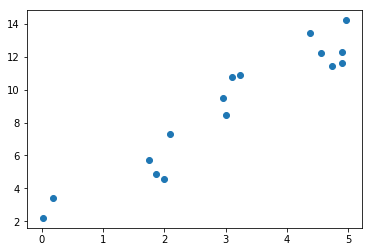

In [34]:
# 来看看产生的x-y分布
x, y = get_fake_data(batch_size=16)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

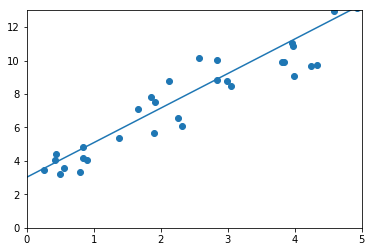

w:  1.986863374710083 b:  2.9016706943511963


In [42]:
# 随机初始化参数
w = t.rand(1, 1).to(device)
b = t.zeros(1, 1).to(device)

lr = 0.01

for ii in range(500):
    x,y = get_fake_data(batch_size=4)
    
    #foaward：计算loss
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.mean()
    
    #backward: 手动计算梯度
    dloss = 1
    dy_pred = dloss * ( y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # 更新参数
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii%50 ==0:

    # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 6.0).view(-1, 1)
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.cpu().numpy(), y.cpu().numpy()) # predicted

        x2, y2 = get_fake_data(batch_size=32) 
        plt.scatter(x2.numpy(), y2.numpy()) # true data

        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)
        
print('w: ', w.item(), 'b: ', b.item())